Kiểm tra DataLoader

In [3]:
import torch
from src.data import get_loader, load_vocab, load_dataset

# Load DataLoader
train_loader, train_dataset = get_loader("data/train.en.gz", "data/train.fr.gz", batch_size=32, shuffle=False)

print(f"Dataset size: {len(train_dataset)}")
print(f"Vocab EN size: {len(train_dataset.src_vocab.stoi)}")
print(f"Vocab FR size: {len(train_dataset.trg_vocab.stoi)}")

# Kiểm tra batch đầu tiên
for src, trg in train_loader:
    print("SRC shape:", src.shape)  # [batch_size, seq_len]
    print("TRG shape:", trg.shape)
    print("SRC example:", src[0])
    print("TRG example:", trg[0])
    break


100%|██████████| 29000/29000 [00:00<00:00, 51761.85it/s]


Dataset size: 29000
Vocab EN size: 5893
Vocab FR size: 6470
SRC shape: torch.Size([32, 24])
TRG shape: torch.Size([32, 25])
SRC example: tensor([   1,   16,   24,   15,   25,  774,   17,   57,   80,  202, 1305,    5,
           2,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0])
TRG example: tensor([   1,   21,   81,   32,  214,   28,   88,   70,    7, 1171,    5,    2,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0])


Test việc lưu và load file vocab, train

In [ ]:
from src.data import get_loader, save_vocab, save_dataset

# Load DataLoader + Dataset
train_loader, train_dataset = get_loader("data/train.en.gz", "data/train.fr.gz", batch_size=32)

# Lưu vocab và dataset
save_vocab(train_dataset.src_vocab, "data/vocab_en.pkl")
save_vocab(train_dataset.trg_vocab, "data/vocab_fr.pkl")
save_dataset(train_dataset, "data/train_dataset.pt")

print("✅ Vocab và dataset đã lưu xong.")


100%|██████████| 29000/29000 [00:01<00:00, 25849.03it/s]


✅ Vocab và dataset đã lưu xong.


In [ ]:
from src.data import load_vocab, load_dataset

# Load lại vocab
src_vocab = load_vocab("data/vocab_en.pkl")
trg_vocab = load_vocab("data/vocab_fr.pkl")

print("Loaded EN vocab size:", len(src_vocab.stoi))
print("Loaded FR vocab size:", len(trg_vocab.stoi))

# Load dataset đã save
train_dataset = load_dataset("data/train_dataset.pt")
print("Loaded dataset size:", len(train_dataset))

# train_dataset = load_dataset("data/train_dataset.pt")
# print(len(train_dataset))


Loaded EN vocab size: 5893
Loaded FR vocab size: 6470
Loaded dataset size: 29000


Xem File vocab_en.pkl / vocab_fr.pkl

In [ ]:
import pickle

# Load vocab
with open("data/vocab_en.pkl", "rb") as f:
    src_vocab = pickle.load(f)

with open("data/vocab_fr.pkl", "rb") as f:
    trg_vocab = pickle.load(f)

# Xem tổng số từ
print("EN vocab size:", len(src_vocab.stoi))
print("FR vocab size:", len(trg_vocab.stoi))

# In 10 từ đầu tiên trong vocab
print("EN sample:", list(src_vocab.stoi.items())[:10])
print("FR sample:", list(trg_vocab.stoi.items())[:10])


EN vocab size: 5893
FR vocab size: 6470
EN sample: [('<pad>', 0), ('<sos>', 1), ('<eos>', 2), ('<unk>', 3), ('a', 4), ('.', 5), ('in', 6), ('the', 7), ('on', 8), ('man', 9)]
FR sample: [('<pad>', 0), ('<sos>', 1), ('<eos>', 2), ('<unk>', 3), ('un', 4), ('.', 5), ('une', 6), ('de', 7), ('en', 8), ("d'", 9)]


In [ ]:
NUM_SAMPLES = 5  # số câu muốn xem
for i in range(NUM_SAMPLES):
    src_idx, trg_idx = train_dataset[i]

    # Chuyển index -> từ
    src_words = [src_vocab.itos[idx.item()] for idx in src_idx if idx.item() not in [src_vocab.stoi["<pad>"]]]
    trg_words = [trg_vocab.itos[idx.item()] for idx in trg_idx if idx.item() not in [trg_vocab.stoi["<pad>"]]]

    print(f"Sample {i+1}:")
    print("EN:", " ".join(src_words))
    print("FR:", " ".join(trg_words))
    print("---")


Sample 1:
EN: <sos> two young , white males are outside near many bushes . <eos>
FR: <sos> deux jeunes hommes blancs sont dehors près de buissons . <eos>
---
Sample 2:
EN: <sos> several men in hard hats are operating a giant pulley system . <eos>
FR: <sos> plusieurs hommes en casque font fonctionner un système de poulies géant . <eos>
---
Sample 3:
EN: <sos> a little girl climbing into a wooden playhouse . <eos>
FR: <sos> une petite fille grimpe dans une maisonnette en bois . <eos>
---
Sample 4:
EN: <sos> a man in a blue shirt is standing on a ladder cleaning a window . <eos>
FR: <sos> un homme dans une chemise bleue se tient sur une échelle pour nettoyer une fenêtre . <eos>
---
Sample 5:
EN: <sos> two men are at the stove preparing food . <eos>
FR: <sos> deux hommes aux fourneaux préparent à manger . <eos>
---


2️⃣ Kiểm tra vocab và dataset

In [ ]:
src_example, trg_example = train_dataset[0]
print("Source indices:", src_example)
print("Target indices:", trg_example)


Source indices: tensor([   1,   16,   24,   15,   25,  774,   17,   57,   80,  202, 1305,    5,
           2])
Target indices: tensor([   1,   21,   81,   32,  214,   28,   88,   70,    7, 1171,    5,    2])


In [ ]:
src_words = [src_vocab.itos[idx.item()] for idx in src_example]
trg_words = [trg_vocab.itos[idx.item()] for idx in trg_example]
print("Source sentence:", " ".join(src_words))
print("Target sentence:", " ".join(trg_words))


Source sentence: <sos> two young , white males are outside near many bushes . <eos>
Target sentence: <sos> deux jeunes hommes blancs sont dehors près de buissons . <eos>


In [ ]:
# Lấy một sample đầu tiên từ dataset
src_example, trg_example = train_dataset[0]

# In ra các index (số) trong câu
print("Source indices:", src_example)
print("Target indices:", trg_example)

# Chuyển các index về từ để đọc được
src_words = [src_vocab.itos[idx.item()] for idx in src_example]
trg_words = [trg_vocab.itos[idx.item()] for idx in trg_example]

print("Source sentence:", " ".join(src_words))
print("Target sentence:", " ".join(trg_words))


Source indices: tensor([   1,   16,   24,   15,   25,  774,   17,   57,   80,  202, 1305,    5,
           2])
Target indices: tensor([   1,   21,   81,   32,  214,   28,   88,   70,    7, 1171,    5,    2])
Source sentence: <sos> two young , white males are outside near many bushes . <eos>
Target sentence: <sos> deux jeunes hommes blancs sont dehors près de buissons . <eos>


3️⃣ Kiểm tra DataLoader

In [ ]:
from torch.utils.data import DataLoader
from src.data import load_dataset, MyCollate, load_vocab

# Load dataset + vocab
train_dataset = load_dataset("data/train_dataset.pt")
src_vocab = load_vocab("data/vocab_en.pkl")
trg_vocab = load_vocab("data/vocab_fr.pkl")

PAD_IDX = src_vocab.stoi["<pad>"]

# Tạo DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,
                          collate_fn=MyCollate(PAD_IDX))

# Xem shape batch đầu tiên
for src_batch, trg_batch in train_loader:
    print(src_batch.shape, trg_batch.shape)
    break


torch.Size([32, 23]) torch.Size([32, 25])


src_batch.shape = [32, 23] → batch size = 32, sequence length nguồn = 23 token.

trg_batch.shape = [32, 25] → batch size = 32, sequence length đích = 25 token.

4️⃣ Training

Epoch [1/1] Loss: 4.3707


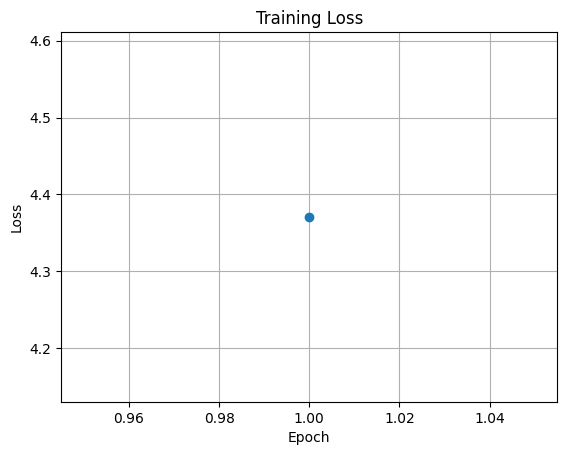

In [3]:
%run src/train_data.py --num_epochs=1 --batch_size=32 --embed_size=256 --hidden_size=512 --num_layers=2 --learning_rate=0.001 --teacher_forcing_ratio=0.5

In [ ]:


import model
from train_data import DEVICE


model.eval()
with torch.no_grad():
    for src, trg in train_loader:
        src, trg = src.to(DEVICE), trg.to(DEVICE)
        output = model(src, trg, teacher_forcing_ratio=0)
        top_words = output.argmax(-1)
        print("Src:", src[0])
        print("Pred:", top_words[0])
        print("Trg:", trg[0])
        break


5️⃣ Kiểm tra model sau training

In [ ]:
model.load_state_dict(torch.load("checkpoints/seq2seq_epoch2.pth"))
model.eval()

with torch.no_grad():
    src_tensor = src_example.unsqueeze(0).to(DEVICE)
    trg_tensor = trg_example.unsqueeze(0).to(DEVICE)
    output = model(src_tensor, trg_tensor, teacher_forcing_ratio=0)
    pred_indices = output.argmax(-1)[0].cpu().tolist()
    pred_sentence = [trg_vocab.itos[idx] for idx in pred_indices]
    print("Predicted sentence:", " ".join(pred_sentence))


6️⃣ Gợi ý cải tiến

1. Teacher forcing: hiện tại là cố định 0.5. Bạn có thể giảm dần theo epoch

2. Gradient clipping: tránh exploding gradients với LSTM:

3. Validation set: nếu có dataset validation, theo dõi val_loss sẽ tốt hơn.

In [ ]:


teacher_forcing_ratio = max(0.5 * (0.9 ** epochs), 0.1)
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)


Load checkpoint

In [ ]:
checkpoint_path = "checkpoints/seq2seq_epoch10.pth"
model.load_state_dict(torch.load(checkpoint_path, map_location=DEVICE))
model.eval()  # Chuyển model sang chế độ eval


In [15]:
import gzip
from collections import Counter
import spacy

# Dùng spaCy để tokenize tiếng Anh
spacy_en = spacy.load("en_core_web_sm")

def tokenize_en(text):
    return [tok.text.lower() for tok in spacy_en.tokenizer(text)]

# ======= Đọc file train.en hoặc train.en.gz =======
file_path = "data/train.en.gz"

if file_path.endswith(".gz"):
    with gzip.open(file_path, mode="rt", encoding="utf-8") as f:
        lines = f.read().strip().split("\n")
else:
    with open(file_path, encoding="utf-8") as f:
        lines = f.read().strip().split("\n")

print(f"✅ Tổng số câu: {len(lines):,}")

# ======= Tokenize toàn bộ tập =======
tokenized_sentences = [tokenize_en(line) for line in lines]

# Đếm số từ trong từng câu
sentence_lengths = [len(sent) for sent in tokenized_sentences]

# Tổng hợp thống kê độ dài câu
avg_len = sum(sentence_lengths) / len(sentence_lengths)
max_len = max(sentence_lengths)
min_len = min(sentence_lengths)

print(f"📊 Độ dài câu:")
print(f"   Trung bình: {avg_len:.2f} từ / câu")
print(f"   Ngắn nhất:  {min_len} từ")
print(f"   Dài nhất:   {max_len} từ")

# ======= Thống kê từ vựng =======
word_freq = Counter([word for sent in tokenized_sentences for word in sent])

unique_words = len(word_freq)
print(f"🧠 Tổng số từ Tiếng anh khác nhau (unique words): {unique_words:,}")

# Hiển thị 20 từ phổ biến nhất
print("\n🔝 20 từ tiếng anh phổ biến nhất:")
for word, freq in word_freq.most_common(20):
    print(f"{word:10s} → {freq}")
rare_words = [w for w, f in word_freq.items() if f == 1]
print(f"Số từ chỉ xuất hiện 1 lần: {len(rare_words)}")
print(f"Tỷ lệ từ hiếm: {len(rare_words)/len(word_freq)*100:.2f}%")



✅ Tổng số câu: 29,000
📊 Độ dài câu:
   Trung bình: 13.11 từ / câu
   Ngắn nhất:  4 từ
   Dài nhất:   41 từ
🧠 Tổng số từ Tiếng anh khác nhau (unique words): 9,793

🔝 20 từ tiếng anh phổ biến nhất:
a          → 49165
.          → 27623
in         → 14886
the        → 10955
on         → 8035
man        → 7781
is         → 7525
and        → 7379
of         → 6871
with       → 6179
woman      → 3973
,          → 3963
two        → 3886
are        → 3717
to         → 3128
people     → 3122
at         → 2927
an         → 2861
wearing    → 2623
shirt      → 2324
Số từ chỉ xuất hiện 1 lần: 3904
Tỷ lệ từ hiếm: 39.87%


In [13]:
import gzip
from collections import Counter
import spacy

# Dùng spaCy để tokenize tiếng Anh
spacy_en = spacy.load("fr_core_news_sm")

def tokenize_en(text):
    return [tok.text.lower() for tok in spacy_en.tokenizer(text)]

# ======= Đọc file train.en hoặc train.en.gz =======
file_path = "data/train.fr.gz"

if file_path.endswith(".gz"):
    with gzip.open(file_path, mode="rt", encoding="utf-8") as f:
        lines = f.read().strip().split("\n")
else:
    with open(file_path, encoding="utf-8") as f:
        lines = f.read().strip().split("\n")

print(f"✅ Tổng số câu: {len(lines):,}")

# ======= Tokenize toàn bộ tập =======
tokenized_sentences = [tokenize_en(line) for line in lines]

# Đếm số từ trong từng câu
sentence_lengths = [len(sent) for sent in tokenized_sentences]

# Tổng hợp thống kê độ dài câu
avg_len = sum(sentence_lengths) / len(sentence_lengths)
max_len = max(sentence_lengths)
min_len = min(sentence_lengths)

print(f"📊 Độ dài câu:")
print(f"   Trung bình: {avg_len:.2f} từ / câu")
print(f"   Ngắn nhất:  {min_len} từ")
print(f"   Dài nhất:   {max_len} từ")

# ======= Thống kê từ vựng =======
word_freq = Counter([word for sent in tokenized_sentences for word in sent])

unique_words = len(word_freq)
print(f"🧠 Tổng số từ Tiếng pháp khác nhau (unique words): {unique_words:,}")

# Hiển thị 20 từ phổ biến nhất
print("\n🔝 20 từ tiếng pháp phổ biến nhất:")
for word, freq in word_freq.most_common(20):
    print(f"{word:10s} → {freq}")
rare_words = [w for w, f in word_freq.items() if f == 1]
print(f"Số từ chỉ xuất hiện 1 lần: {len(rare_words)}")
print(f"Tỷ lệ từ hiếm: {len(rare_words)/len(word_freq)*100:.2f}%")



✅ Tổng số câu: 29,000
📊 Độ dài câu:
   Trung bình: 14.28 từ / câu
   Ngắn nhất:  4 từ
   Dài nhất:   54 từ
🧠 Tổng số từ Tiếng pháp khác nhau (unique words): 11,149

🔝 20 từ tiếng pháp phổ biến nhất:
un         → 34942
.          → 27680
une        → 20624
de         → 14013
en         → 9866
d'         → 8139
dans       → 8059
sur        → 7957
homme      → 7887
et         → 7426
des        → 7406
avec       → 7177
la         → 5651
à          → 5326
,          → 4800
femme      → 4454
l'         → 4284
deux       → 4068
le         → 3699
est        → 3257
Số từ chỉ xuất hiện 1 lần: 4683
Tỷ lệ từ hiếm: 42.00%


Quy tắc giới hạn vocab
  - Chọn chỉ giữ N từ phổ biến nhất,
  - Hoặc lọc theo tần suất tối thiểu (ví dụ: chỉ giữ các từ xuất hiện ≥ 2 lần).

Quá trình tổng quát:
  - Đếm toàn bộ từ trong tập dữ liệu.
  - Tính tần suất xuất hiện.
  - Loại bỏ từ hiếm (ví dụ: freq < 5).
  - Giữ lại các từ phổ biến nhất (ở đây: ~5.9k cho EN, ~6.4k cho FR).
  - Thêm 4 token đặc biệt vào đầu (<pad>, <sos>, <eos>, <unk>).
  - Tạo mapping word → index và index → word.

Tiếng Pháp (French)
  + Số từ xuất hiện duy nhất (unique) ngôn ngữ French: 11.149 
  + Từ xuất hiện 1 lần: 4.683
  + Vocab giữ lại: 11.149 - 4.683 + 4 = 5893 từ

Tiếng Anh (English)
  + Số từ xuất hiện duy nhất (unique) ngôn ngữ English: 9.793
  + Từ xuất hiện 1 lần: 3.904
  + Vocab giữ lại: 9.793 - 3.904 + 4 = 6470 từ



In [2]:
# Lấy một sample đầu tiên từ dataset
src_example, trg_example = train_dataset[0]

# In ra các index (số) trong câu
print("Source indices:", src_example)
print("Target indices:", trg_example)

# Chuyển các index về từ để đọc được
src_words = [src_vocab.itos[idx.item()] for idx in src_example]
trg_words = [trg_vocab.itos[idx.item()] for idx in trg_example]

print("Source sentence:", " ".join(src_words))
print("Target sentence:", " ".join(trg_words))


Source indices: tensor([   1,   16,   24,   15,   25,  774,   17,   57,   80,  202, 1305,    5,
           2])
Target indices: tensor([   1,   21,   81,   32,  214,   28,   88,   70,    7, 1171,    5,    2])
Source sentence: <sos> two young , white males are outside near many bushes . <eos>
Target sentence: <sos> deux jeunes hommes blancs sont dehors près de buissons . <eos>
